# 1. Генерація зображень

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import initializers

import matplotlib.pyplot as plt
import numpy as np


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


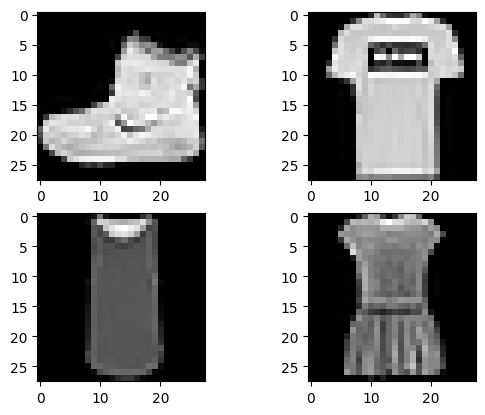

In [3]:
fig,axe=plt.subplots(2,2)
idx = 0
for i in range(2):
    for j in range(2):
        axe[i,j].imshow(x_train[idx].reshape(28,28),cmap='gray')
        idx+=1

In [4]:


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape[0], 'train samples')
print('image shape', x_train[0].shape)
#x_train=x_train.reshape(-1,28,28,1)
print(x_train.shape)


60000 train samples
image shape (28, 28)
(60000, 28, 28)


In [5]:

x_train = x_train.astype('float32') 
# normilization [-1, 1]
x_train = x_train/255
x_train = x_train*2 - 1

In [6]:


#input_dim = 784
#x_train = x_train.reshape(60000, input_dim)
print('input shape: ', x_train.shape)
#x_train = (x_train.astype(np.float32)) 
# normilization [-1, 1]
#x_train = x_train/255
#x_train = x_train*2 - 1


input shape:  (60000, 28, 28)


In [7]:
optim = tf.keras.optimizers.legacy.Adam(learning_rate=0.0002, beta_1=0.5)

In [8]:
def build_discriminator():
    model =  keras.Sequential()
    
    model.add(layers.Conv2D(64, kernel_size=5, strides=2, padding="same", activation=layers.LeakyReLU(0.3), input_shape=[28, 28, 1]))
    #model.add(layers.LeakyReLU(alpha=0.2))
    
    model.add(layers.Dropout(0.5))
    model.add(layers.Conv2D(128, kernel_size=5, strides=2, padding="same", activation=layers.LeakyReLU(0.3)))
    #model.add(layers.LeakyReLU(alpha=0.2))
              
   
    #model.add(layers.Conv2D(128, kernel_size=5, strides=2, padding="same"))
    #model.add(layers.LeakyReLU(alpha=0.2))
    #model.add(layers.Dropout(0.5))          
    model.add(layers.Flatten())
    
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optim)  
    model.summary()
              
    return model

In [10]:
latent_dim = 100

def build_generator():
    

    model = keras.Sequential()
    model.add(layers.Dense(7*7*128,input_shape=[latent_dim]))
    model.add(layers.Reshape([7,7,128]))
    model.add(layers.BatchNormalization())
    #model.add(layers.LeakyReLU(alpha=0.2))
    
    #model.add(layers.Conv2DTranspose(64, (4,4),2, padding="same", activation="relu"))
    model.add(layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="same",activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="same",activation="tanh"))
    #model.add(layers.LeakyReLU(alpha=0.2))
    #model.add(layers.Dense(784))
    #model.add(layers.Reshape([28,28,1]))
    model.summary()
    return model  

In [11]:
generator = build_generator()
discriminator = build_discriminator()
GAN =keras.Sequential([generator,discriminator])
discriminator.compile(optimizer='adam',loss='binary_crossentropy')
discriminator.trainable = False

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              633472    
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 128)        512       
 ormalization)                                                   
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       204864    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                        

In [12]:
GAN.compile(optimizer='adam',loss='binary_crossentropy')

In [13]:


GAN.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 1)         840705    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 212865    
                                                                 
Total params: 1,053,570
Trainable params: 840,321
Non-trainable params: 213,249
_________________________________________________________________


In [14]:

epochs = 20
batch_size = 100
noise_shape=100
#train_model(epochs, batch_size)



Started Epoch 1
	Reached batch number 200 of 600
	Reached batch number 400 of 600
	Reached batch number 600 of 600
1/1 [==============================] - 0s 84ms/step


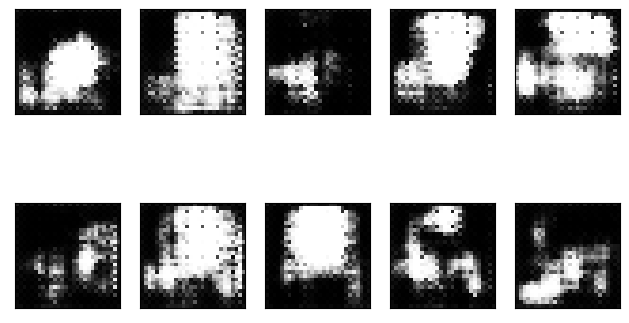

Started Epoch 2
	Reached batch number 200 of 600
	Reached batch number 400 of 600
	Reached batch number 600 of 600
Started Epoch 3
	Reached batch number 200 of 600
	Reached batch number 400 of 600
	Reached batch number 600 of 600
Started Epoch 4
	Reached batch number 200 of 600
	Reached batch number 400 of 600
	Reached batch number 600 of 600
Started Epoch 5
	Reached batch number 200 of 600
	Reached batch number 400 of 600
	Reached batch number 600 of 600
Started Epoch 6
	Reached batch number 200 of 600
	Reached batch number 400 of 600
	Reached batch number 600 of 600
1/1 [==============================] - 0s 18ms/step


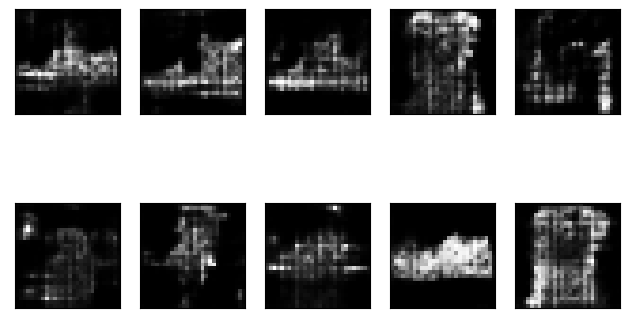

Started Epoch 7
	Reached batch number 200 of 600
	Reached batch number 400 of 600
	Reached batch number 600 of 600
Started Epoch 8
	Reached batch number 200 of 600
	Reached batch number 400 of 600
	Reached batch number 600 of 600
Started Epoch 9
	Reached batch number 200 of 600
	Reached batch number 400 of 600
	Reached batch number 600 of 600
Started Epoch 10
	Reached batch number 200 of 600
	Reached batch number 400 of 600
	Reached batch number 600 of 600
Started Epoch 11
	Reached batch number 200 of 600
	Reached batch number 400 of 600
	Reached batch number 600 of 600
1/1 [==============================] - 0s 17ms/step


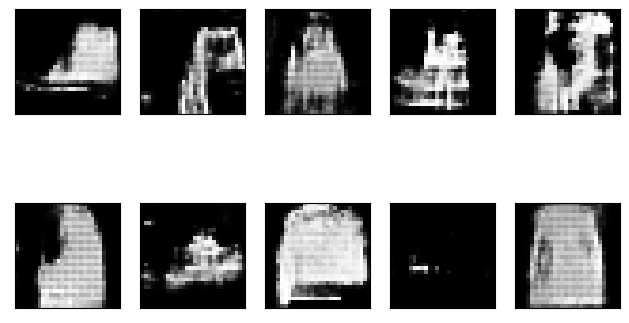

Started Epoch 12
	Reached batch number 200 of 600
	Reached batch number 400 of 600
	Reached batch number 600 of 600
Started Epoch 13
	Reached batch number 200 of 600
	Reached batch number 400 of 600
	Reached batch number 600 of 600
Started Epoch 14
	Reached batch number 200 of 600
	Reached batch number 400 of 600
	Reached batch number 600 of 600
Started Epoch 15
	Reached batch number 200 of 600
	Reached batch number 400 of 600
	Reached batch number 600 of 600
Started Epoch 16
	Reached batch number 200 of 600
	Reached batch number 400 of 600
	Reached batch number 600 of 600
1/1 [==============================] - 0s 16ms/step


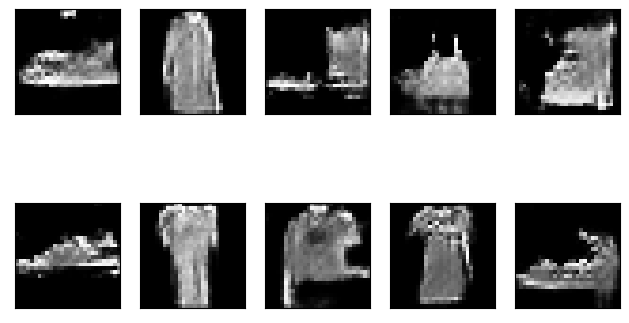

Started Epoch 17
	Reached batch number 200 of 600
	Reached batch number 400 of 600
	Reached batch number 600 of 600
Started Epoch 18
	Reached batch number 200 of 600
	Reached batch number 400 of 600
	Reached batch number 600 of 600
Started Epoch 19
	Reached batch number 200 of 600
	Reached batch number 400 of 600
	Reached batch number 600 of 600
Started Epoch 20
	Reached batch number 200 of 600
	Reached batch number 400 of 600
	Reached batch number 600 of 600
Finished training


In [15]:

for epoch in range(epochs):
    print(f"Started Epoch {epoch+1}")
    
    
    for i in range(x_train.shape[0]//batch_size):
        
        if (i+1)%200 == 0:
            print(f"\tReached batch number {i+1} of {x_train.shape[0]//batch_size}")
            
        noise=np.random.normal(size=[batch_size,noise_shape])
       
        gen_image = generator.predict_on_batch(noise)
        
        train_dataset = x_train[i*batch_size:(i+1)*batch_size]
       
        #training discriminator on real images
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = True
        d_loss_real=discriminator.train_on_batch(train_dataset,train_label)
        
        #training discriminator on fake images
        train_label=np.zeros(shape=(batch_size,1))
        d_loss_fake=discriminator.train_on_batch(gen_image,train_label)
        
        
        #training generator 
        noise=np.random.normal(size=[batch_size,noise_shape])
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = False
        
        d_g_loss_batch =GAN.train_on_batch(noise, train_label)
        
        
        
       
    #plotting generated images at the start and then after every 10 epoch
    if epoch % 5 == 0:
        samples = 10
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()

        
        
print('Finished training')

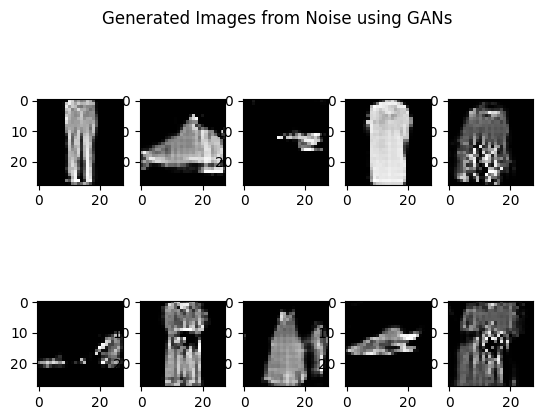

In [16]:
fig,axe=plt.subplots(2,5)
fig.suptitle('Generated Images from Noise using GANs')
idx=0
for i in range(2):
    for j in range(5):
         axe[i,j].imshow(gen_image[idx].reshape(28,28),cmap='gray')
         idx+=1